In [1]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

%matplotlib inline

In [2]:
mpg_df = pd.read_csv("mpg.csv")
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
mpg             42 non-null object
cylinders       42 non-null int64
displacement    42 non-null int64
horsepower      42 non-null int64
weight          42 non-null int64
acceleration    42 non-null float64
modelyear       42 non-null int64
maker           42 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ KB


In [3]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker
0,Bad,8,350,150,4699,14.5,74,America
1,Bad,8,400,170,4746,12.0,71,America
2,Bad,8,400,175,4385,12.0,72,America
3,Bad,6,250,72,3158,19.5,75,America
4,Bad,8,304,150,3892,12.5,72,America


In [4]:
mpg_df.mpg.replace(['Good','OK','Bad'], [1,1,0], inplace=True)

In [5]:
pd.set_option('display.max_rows', 10)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker
0,0,8,350,150,4699,14.5,74,America
1,0,8,400,170,4746,12.0,71,America
2,0,8,400,175,4385,12.0,72,America
3,0,6,250,72,3158,19.5,75,America
4,0,8,304,150,3892,12.5,72,America
...,...,...,...,...,...,...,...,...
37,1,4,81,60,1760,16.1,81,Europe
38,1,4,135,84,2370,13.0,82,America
39,1,4,105,63,2125,14.7,82,America
40,0,4,135,84,2370,13.0,82,America


In [6]:
mpg_df.maker.replace(['America','Asia','Europe'], [1,2,3], inplace=True)

In [7]:
pd.set_option('display.max_rows', 10)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker
0,0,8,350,150,4699,14.5,74,1
1,0,8,400,170,4746,12.0,71,1
2,0,8,400,175,4385,12.0,72,1
3,0,6,250,72,3158,19.5,75,1
4,0,8,304,150,3892,12.5,72,1
...,...,...,...,...,...,...,...,...
37,1,4,81,60,1760,16.1,81,3
38,1,4,135,84,2370,13.0,82,1
39,1,4,105,63,2125,14.7,82,1
40,0,4,135,84,2370,13.0,82,1


In [8]:
# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

data=mpg_df
v1='weight'
v2='displacement'
tv='mpg'

# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) - 1, max(data[v1]) + 1])
    plt.ylim([min(data[v2]) - .05, max(data[v2]) + .05])
    
def Decision_Surface(x, y, model, cell_size=.01):
    # Get blob sizes for shading
    x = (min(x), max(x))
    y = (min(y), max(y))
    x_step = (x[1] - x[0]) * cell_size
    y_step = (y[1] - y[0]) * cell_size

    # Create blobs
    x_values = []
    y_values = []
    
    for i in np.arange(x[0], x[1], x_step):
        for j in np.arange(y[0], y[1], y_step):
            y_values.append(float(i))
            x_values.append(float(j))
    
    data_blob = pd.DataFrame({"x": x_values, "y": y_values})

    # Predict the blob labels
    label= decision_tree.predict(data_blob)
    
    # Color and plot them
    color = ["red" if l == 0 else "blue" for l in label]
    plt.scatter(data_blob['y'], data_blob['x'], marker='o', edgecolor='black', linewidth='0', c=color, alpha=0.3)
    
    # Get the raw decision tree rules
    decision_tree_raw = []
    for feature, left_c, right_c, threshold, value in zip(decision_tree.tree_.feature, 
                                                          decision_tree.tree_.children_left, 
                                                          decision_tree.tree_.children_right, 
                                                          decision_tree.tree_.threshold, 
                                                          decision_tree.tree_.value):
        decision_tree_raw.append([feature, left_c, right_c, threshold, value])

    # Plot the data
    Plot_Data(mpg_df, "weight", "displacement", "mpg")

    # Used for formatting the boundry lines
    currentAxis = plt.gca()
    line_color = "black"
    line_width = 3

    # For each rule
    for row in decision_tree_raw:
        feature, left_c, right_c, threshold, value = row

        if threshold != -2:
            if feature == 0:
                plt.plot([20, 100], [threshold, threshold], c=line_color, linewidth=line_width)
            else:
                plt.plot([threshold, threshold], [0, 5], c=line_color, linewidth=line_width)

    plt.xlim([min(x) - 1, max(x) + 1])
    plt.ylim([min(y) - .05, max(y) + .05])
    plt.show()

In [9]:
def entropy(target):
    # Get the number of mpg
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig

In [10]:
X = mpg_df[['weight','displacement']]
Y=mpg_df['mpg']
n_cars=42
Yn=pd.to_numeric(Y)

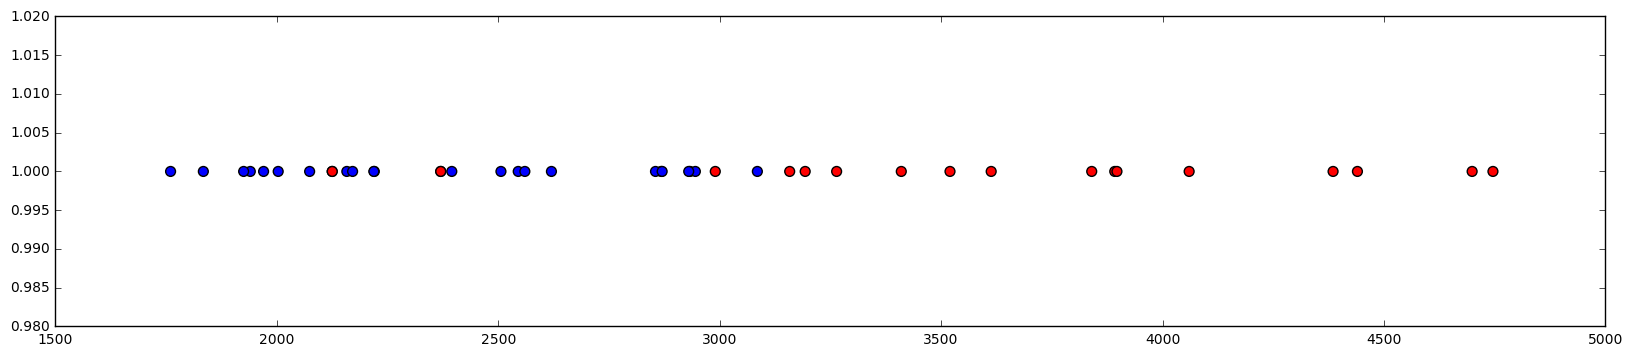

In [11]:
# Make the plot long
plt.rcParams['figure.figsize'] = [20.0, 4.0]
color = ["red" if x == 0 else "blue" for x in mpg_df["mpg"]]
plt.scatter(X['weight'], [1] * n_cars, c=color, s=50)

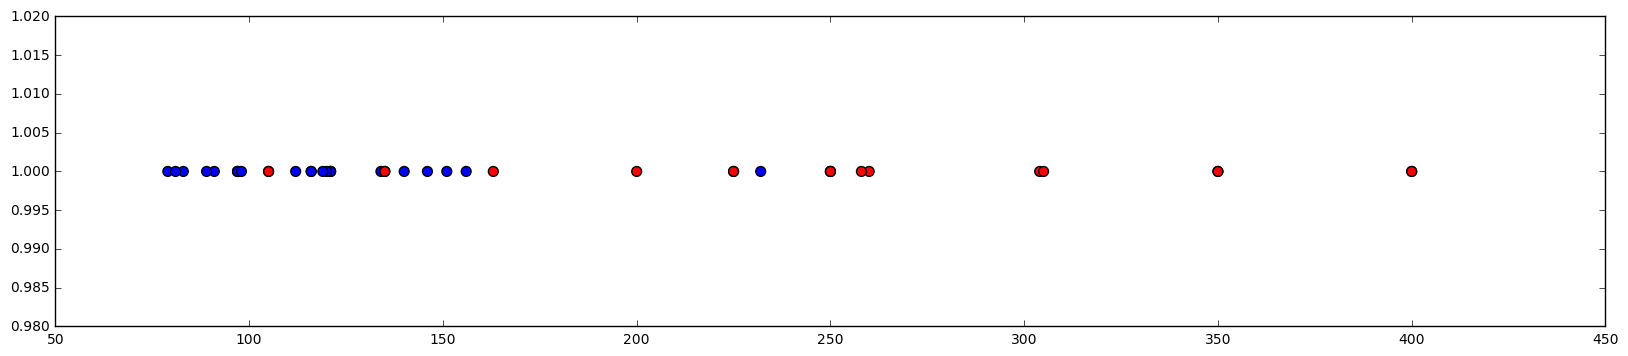

In [12]:
# Make the plot long
plt.rcParams['figure.figsize'] = [20.0, 4.0]
color = ["red" if x == 0 else "blue" for x in mpg_df["mpg"]]
plt.scatter(X['displacement'], [1] * n_cars, c=color, s=50)

In [13]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['cylinders']:
        ig = information_gain(mpg_df['cylinders'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of cylinders = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of cylinders = 0.404 and it occured by splitting on 6.0000.


In [14]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['displacement']:
        ig = information_gain(mpg_df['displacement'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of displacement = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of displacement = 0.482 and it occured by splitting on 163.0000.


In [15]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['horsepower']:
        ig = information_gain(mpg_df['horsepower'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of horsepower = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of horsepower = 0.370 and it occured by splitting on 105.0000.


In [16]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['weight']:
        ig = information_gain(mpg_df['weight'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of weight = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of weight = 0.542 and it occured by splitting on 3158.0000.


In [17]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['acceleration']:
        ig = information_gain(mpg_df['acceleration'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of acceleration = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of acceleration = 0.087 and it occured by splitting on 13.0000.


In [18]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['modelyear']:
        ig = information_gain(mpg_df['modelyear'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of modelyear = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of modelyear = 0.062 and it occured by splitting on 80.0000.


In [19]:
def best_threshold():
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in mpg_df['maker']:
        ig = information_gain(mpg_df['maker'], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of maker = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)

print best_threshold()

The maximum IG of maker = 0.223 and it occured by splitting on 2.0000.


What are the top 3 most informative features? 

What is the maximum information gain and the corresponding threshold for each top 3 features?

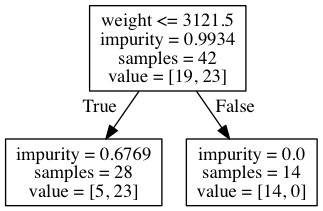

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=1, criterion="entropy")
decision_tree.fit(X, Y)
Decision_Tree_Image(decision_tree, X.columns)

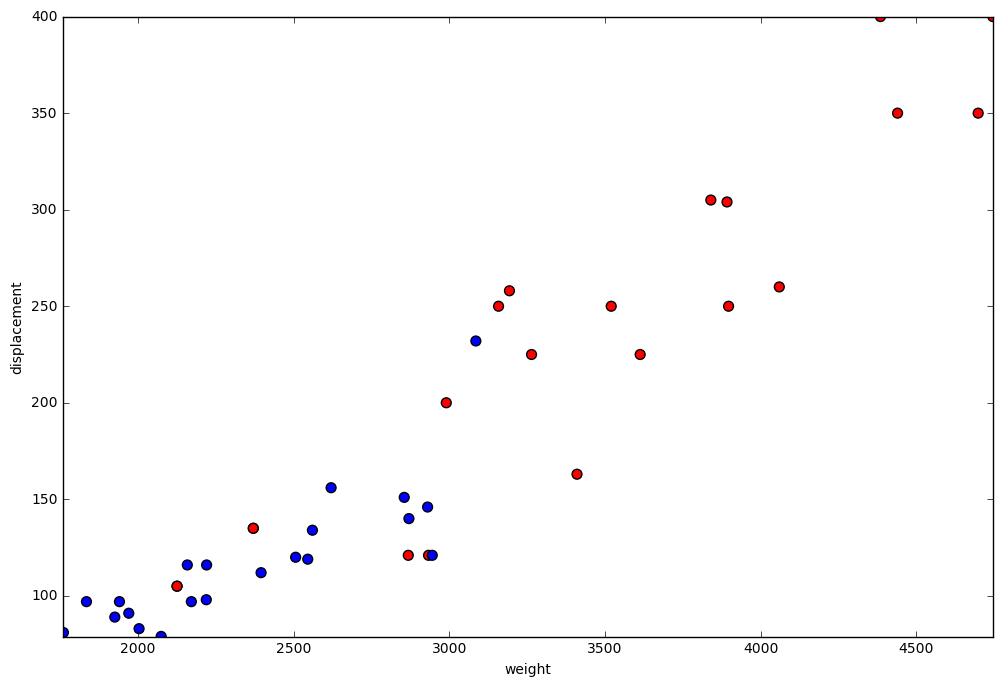

In [21]:
Plot_Data(mpg_df, "weight", "displacement", "mpg")

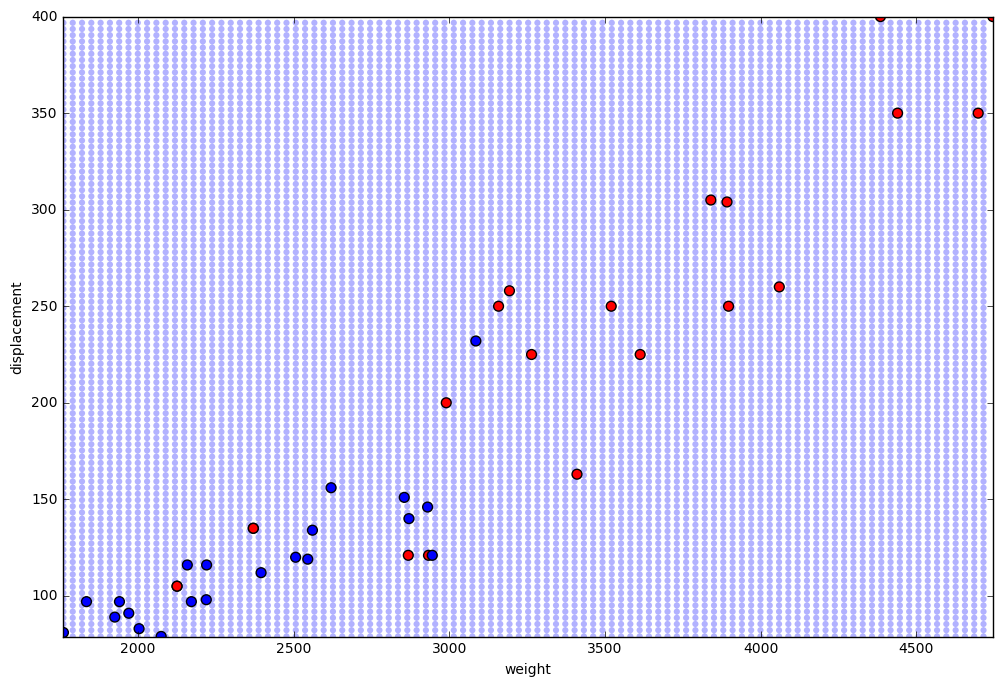

In [22]:
Decision_Surface(mpg_df['weight'], mpg_df['displacement'], decision_tree)

In [23]:
print "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), Y))

Accuracy = 0.881


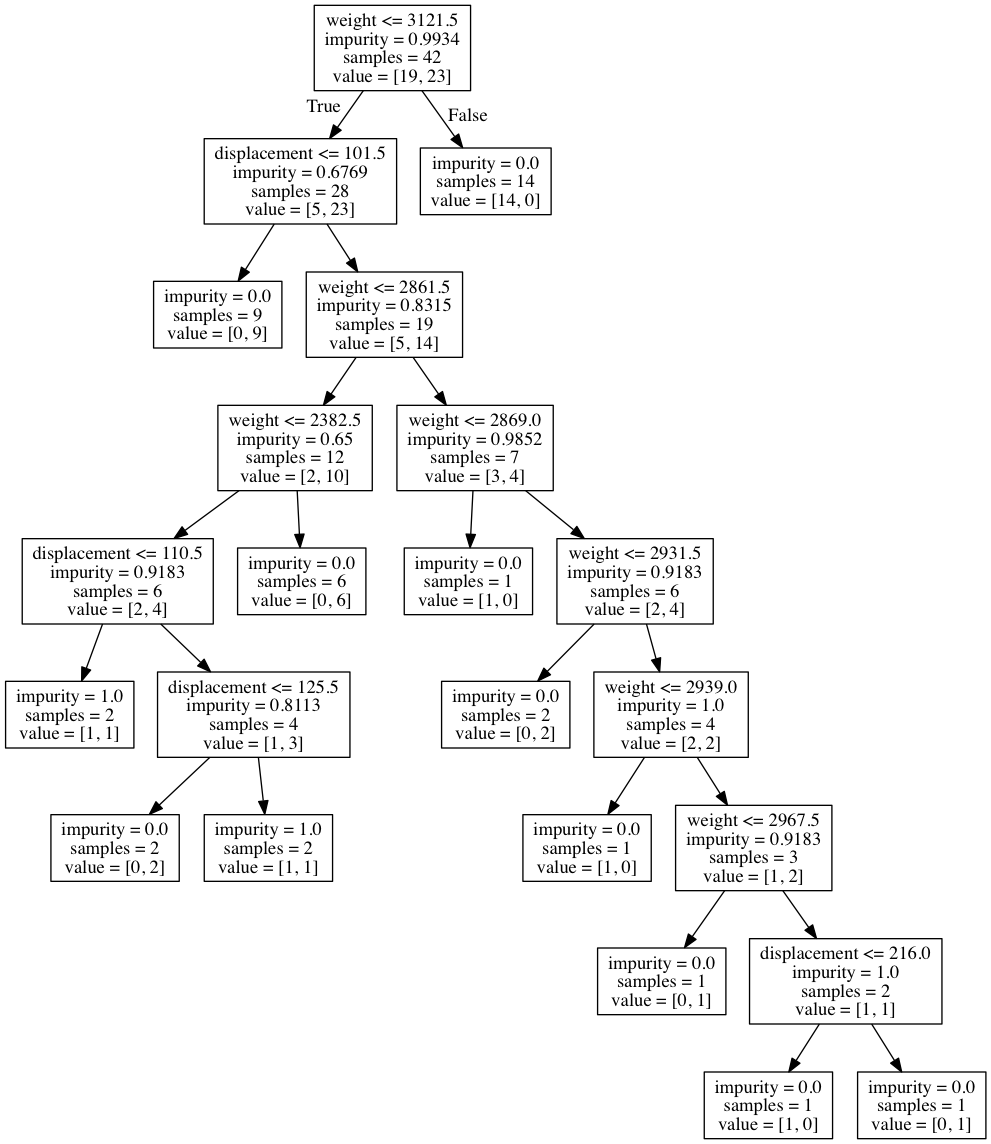

In [24]:
decision_tree = DecisionTreeClassifier(max_depth=10, criterion="entropy")
decision_tree.fit(X, Y)
Decision_Tree_Image(decision_tree, X.columns)

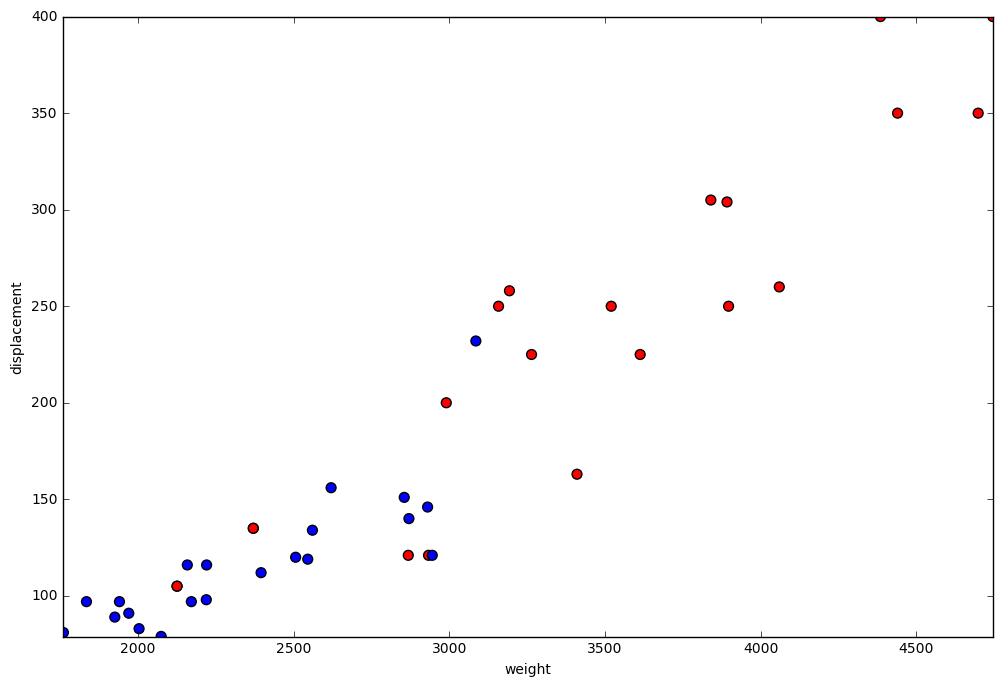

In [25]:
Plot_Data(mpg_df, "weight", "displacement", "mpg")

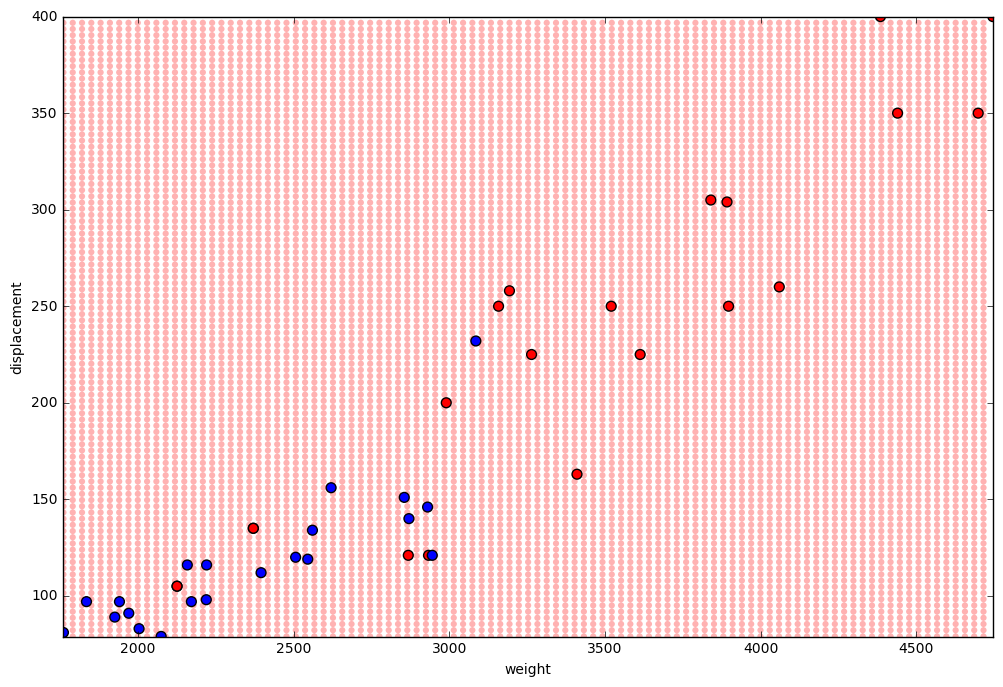

In [26]:
Decision_Surface(mpg_df['weight'], mpg_df['displacement'], decision_tree)

In [27]:
print "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), Y))

Accuracy = 0.952
